In [5]:
def editDistance(x, y):
    
    D = []
    for i in range(len(x)+1):
        D.append([0]* (len(y)+1))
    
    for i in range(len(x)+1):
        D[i][0] = i
        
    for i in range(1, len(x)+1):
        for j in range(1, len(y)+1):
            distHor = D[i][j-1] + 1
            distVer = D[i-1][j] + 1
            if x[i-1] == y [i-1]:
                distDiag = D[i-1][j-1]
            else:
                distDiag = D[i-1][j-1] + 1
                
            D[i][j] = min(distHor, distVer, distDiag)
            
    return D[-1][-1]

In [6]:
%%time

x = "shake spea"
y = "Shakespear"
editDistance(x,y)

CPU times: user 137 µs, sys: 5 µs, total: 142 µs
Wall time: 149 µs


6

# **Learn to implement Edit Distance from Scratch**

Edit Distance or Levenstein distance (the most common) is a metric to calculate the similarity between a pair of sequences. The distance between two sequences is measured as the number of edits (insertion, deletion, or substitution) that are required to convert one sequence to another.

In this section, we will learn to implement the Edit Distance.

#### **Distance metric**

The Levenstein distance is calculated using the following:

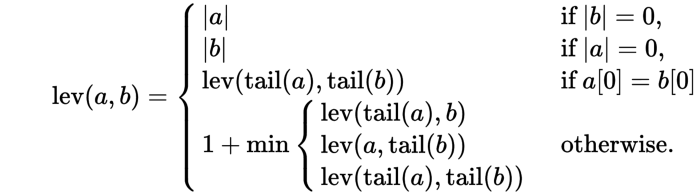

Where tail means rest of the sequence except for the 1st character, in Python lingo it is a[1:].

The explanations of the conditions are:

1. If b is an empty sequence (|b|=0), then cost is the length of a (|a|).
2. If a is an empty sequence (|a|=0), then cost is the length of b (|b|).
3. If the 1st characters of a & b are the same (a[0] = b[0]), then the cost is the cost of subsequence tail(a) (a[1:]) and tail(b) (b[1:]).

Finally, the cost is the minimum of insertion, deletion, or substitution operation, which are as defined:
1. lev(tail(a), b) indicates a character is deleted from a
2. lev(a, tail(b) indicates a character is inserted to a
3. lev(tail(a), tail(b)) indicates substitution

**Note: here in the formula above, the cost of insertion, deletion, or substitution has been kept the same i.e. 1. But, the cost of substitution is generally considered as 2, which we will use in the implementation.**


### **Edit distance using Recursion**

We can directly convert the above formula into a Recursive function to calculate the Edit distance between two sequences, but the time complexity of such a solution is 𝑂(3(𝑚+𝑛)).

So, once we get clarity on how does Edit distance work, we will write a more optimized solution for it using **Dynamic Programming** having a time complexity of 𝑂(𝑚∗𝑛).

**Below is the Recursive function.** I will also, add some narration i.e. the function to print out the operations (insertion, deletion, or substitution) it is performing.


In [7]:
# Below are the costs of different operations.
ins_cost = 1
del_cost = 1
sub_cost = 2
# Below function will take the two sequence and will return the distance between them.
def edit_distance_recurse(seq1, seq2, operations=[]):
    """Returns the Edit Distance between the provided two sequences."""
    
    if len(seq2) == 0:
        operations = operations + ([f"Delete `{seq1}` from sequence1."] if len(seq1) else [])
        return len(seq1), operations
    
    if len(seq1) == 0:
        operations = operations + ([f"Insert `{seq2}` into sequence1."] if len(seq2) else [])
        return len(seq2), operations
    
    if seq1[0] == seq2[0]:
        operations = operations + [f"Make no change for character `{seq1[0]}`."]
        return edit_distance_recurse(seq1[1: ], seq2[1: ], operations)
    
    # calculate cost if insertion was made
    ins_operations = operations + [f"Insert `{seq2[0]}` in sequence1."]
    insertion, ins_operations = edit_distance_recurse(seq1, seq2[1: ], ins_operations)
    
    # calculate cost if deletion was done
    del_operations = operations + [f"Delete `{seq1[0]}` from sequence1."]
    deletion, del_operations = edit_distance_recurse(seq1[1: ], seq2, del_operations)
    
    # calculate cost if substitution was done
    sub_operations = operations + [f"Replace `{seq1[0]}` in sequence1 with `{seq2[0]}`."]
    substitution, sub_operations = edit_distance_recurse(seq1[1: ], seq2[1: ], sub_operations)
    
    # calculate minimum cost
    min_cost = min(insertion + ins_cost, deletion + del_cost, substitution + sub_cost)
    
    if min_cost == (substitution + sub_cost):
        return min_cost, sub_operations
    elif min_cost == deletion + del_cost:
        return min_cost, del_operations
    else:
        return min_cost, ins_operations

### **Let’s test this function for some examples**

In [8]:
seq1 = "numpy"
seq2 = "numexpr"
score, operations = edit_distance_recurse(seq1, seq2)
print(f"Edit Distance between `{seq1}` & `{seq2}` is: {score}")
print("\nOperations performed are:\n")
for operation in operations:
    print(operation)

Edit Distance between `numpy` & `numexpr` is: 4

Operations performed are:

Make no change for character `n`.
Make no change for character `u`.
Make no change for character `m`.
Insert `e` in sequence1.
Insert `x` in sequence1.
Make no change for character `p`.
Replace `y` in sequence1 with `r`.


The reason for Edit distance to be 4 is: characters n,u,m remain same (hence the 0 cost), then e & x are inserted resulted in the total cost of 2 so far. Then, no change was made for p, so no change in cost and finally, y is replaced with r, which resulted in an additional cost of 2.
Hence, the total cost is 4.

## **Edit Distance using Dynamic Programming**

Dynamic programming can be applied to the problems that have overlapping subproblems. Like in our case, where to get the Edit distance between numpy & numexpr, we first compute the same for sub-sequences nump & nume, then for numpy & numex and so on...

Once, we solve a particular subproblem we store its result, which later on is used to solve the overall problem.

To know more about Dynamic Programming you can refer to my short tutorial — Introduction to Dynamic Programming.

**Let’s now understand how to break the problem into sub-problems, store the results and then solve the overall problem.**

In the image below — across the rows we have sequence1 which we want to convert into sequence2 (which is across the columns) with minimum conversion cost.

The character # before the two sequences indicate the empty string or the beginning of the string.

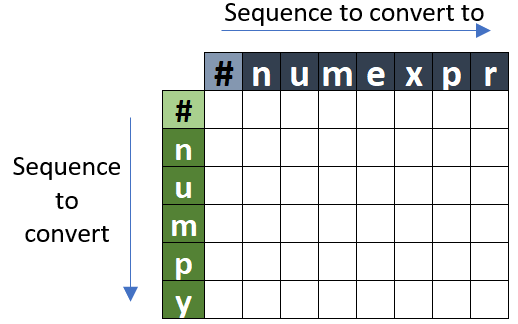

Now, we will fill this Matrix with the cost of different sub-sequence to get the overall solution. But, first, let’s look at the base cases:

* When sequence1 is empty, then the cost to get sequence2 is just the cost of adding the characters which are present in the sequence2. The first row in the Maxtrix indicates that sequence1 is empty.

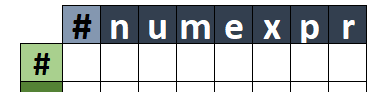

* If both the sequences are empty, then the cost is 0.